# 1. 术语
## 1.1 (监督式)机器学习
机器学习系统通过学习如何组合输入信息来对从未见过的数据做出有用的预测。

## 1.2 标签
标签是我们要预测的事物，即简单线性回归中的 y 变量。标签可以是小麦未来的价格、图片中显示的动物品种、音频剪辑的含义或任何事物。

## 1.3 特征(feature)
特征是输入变量，即简单线性回归中的 x 变量。简单的机器学习项目可能会使用单个特征，而比较复杂的机器学习项目可能会使用数百万个特征，按如下方式指定：
$${x_1, x_2, ..., x_N}$$

在垃圾邮件检测器示例中，特征可能包括：

- 电子邮件文本中的字词
- 发件人的地址
- 发送电子邮件的时段
- 电子邮件中包含“一种奇怪的把戏”这样的短语。

## 1.4 样本
样本是指数据的特定实例：**x**。（我们采用粗体 x 表示它是一个矢量。）我们将样本分为以下两类：
- 有标签样本
- 无标签样本

有标签样本同时包含特征和标签。即：
```
labeled examples: {features, label}: (x, y)
```

我们使用有标签样本来训练模型。在我们的垃圾邮件检测器示例中，有标签样本是用户明确标记为“垃圾邮件”或“非垃圾邮件”的各个电子邮件。

无标签样本包含特征，但不包含标签。即：
```
unlabeled examples: {features, ?}: (x, ?)
```

在使用有标签样本训练了我们的模型之后，我们会使用该模型来预测无标签样本的标签。在垃圾邮件检测器示例中，无标签样本是用户尚未添加标签的新电子邮件。

## 1.5 模型
模型定义了特征与标签之间的关系。例如，垃圾邮件检测模型可能会将某些特征与“垃圾邮件”紧密联系起来。我们来重点介绍一下模型生命周期的两个阶段：
- 训练表示创建或学习模型。也就是说，您向模型展示有标签样本，让模型逐渐学习特征与标签之间的关系。
- 推断表示将训练后的模型应用于无标签样本。也就是说，您使用训练后的模型来做出有用的预测 (y')。例如，在推断期间，您可以针对新的无标签样本预测 medianHouseValue。


## 1.6 回归与分类
回归模型可预测连续值。例如，回归模型做出的预测可回答如下问题：
- 加利福尼亚州一栋房产的价值是多少？
- 用户点击此广告的概率是多少？

分类模型可预测离散值。例如，分类模型做出的预测可回答如下问题：
- 某个指定电子邮件是垃圾邮件还是非垃圾邮件？
- 这是一张狗、猫还是仓鼠图片？


# 2. sklearn线性模型
线性模型中，目标值是由所有相关输入变量的线性组合所构成。使用数学公式表达如下，其中$\bar{y}$为预测值，$x_1, ..., x_m$为输入变量：

$$\bar{y}(\theta, x)=\theta _0 + \theta _1 x_1 + ... + \theta _p x_m$$

其中$(\theta _0, ..., \theta _m)$为线性模型中待确定的参数。在sklearn中，我们称$\theta = (\theta _1, ..., \theta _m)$为`coef_`(系数)，$\theta _0$为`intercept_`(截距)。

在计算线性模型参数时，使用不同的方法，例如最小二乘等。

## 2.1 最小二乘
`LinearRegression`进行回归拟合时，使用的成本函数(cost function)如下所示。目标是所选取的参数$\theta$使得下列成本函数的值最小：
$$J(\theta_0, \theta_1)=\frac{1}{m}\sum_{i=1}^{m}(\bar{y}_i-y_i)^2$$

调用`fit()`方法拟合后，计算得到的参数$\theta$保存在模型的`coef_`和`intercept_`中。

采用最小二乘拟合时，要求所选取的特征($x_1,...,x_p$)之间互相独立，否则很容易受到随机误差的干扰。

# 3. 线性回归-Hacker Statistic

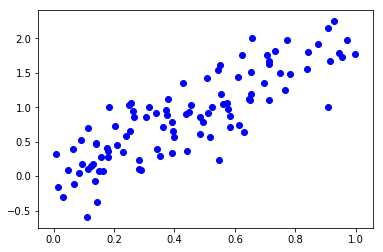

In [37]:
import numpy as np                                                 
import matplotlib.pyplot as plt                                    

# 模拟数据
x_train = np.array([[np.random.random()] for i in range(101)])
# 为对应的y值加上一些噪声数据
y_train = 2 * x_train + [[k*0.33] for k in np.random.randn(len(x_train))]

# 绘制散点图
plt.scatter(x_train, y_train, color='blue')                                      
plt.show()                                                         

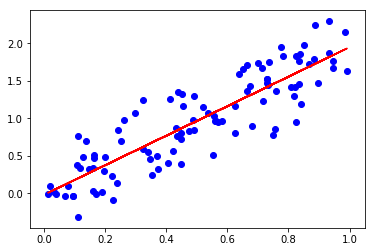

0.09152718639630095


In [30]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# 使用得到的模型根据x_train数据，预测得到y_prime数据
y_prime = model.predict(x_train)

# 绘制散点图
plt.scatter(x_train, y_train, color='blue')                                      
plt.plot(x_train, y_prime, color='red')
plt.show()

In [36]:
# 计算y_prime与y_train之间的误差
mse = np.mean((y_prime-y_train)**2)
print(mse)

print("线性方程: {}*x + {}".format(model.coef_[0][0], model.intercept_[0]))

5.477462247980117
线性方程: 1.9706746041752385*x + -0.020292739463500742


# 练习1
以下表格是某人统计的睡眠时间与其第二天每小时阅读速度的数据：

| 睡眠时间(小时)   |  第二天阅读效率(页/小时) |
| :-------- | --------:| 
| 8.5    |   26 | 
| 7.2    |   22 | 
| 10    |   32 | 
| 5.2    |   15 | 
| 2    |   18 | 
| 3.5    |   13 | 
| 8    |   19 | 
| 9    |   31 | 

使用线性回归建模，并预测睡眠时间为10.5小时，第二天的阅读效率？

模型为$Y=\omega x + b$，其中X为睡眠时间。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

**要求**：使用散点图绘制X和Y的数据，补充下面代码块中标记为'_____'的代码

[[ 8.5]
 [ 7.2]
 [10. ]
 [ 5.2]
 [ 2. ]
 [ 3.5]
 [ 8. ]
 [ 9. ]] [[26]
 [22]
 [32]
 [15]
 [18]
 [13]
 [19]
 [31]]


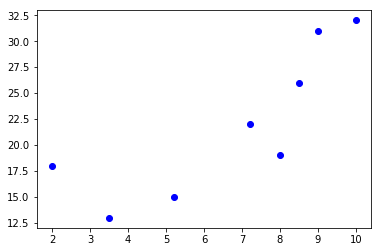

In [20]:
dataset = [
    [8.5, 26],
    [7.2, 22],
    [10, 32],
    [5.2, 15],
    [2, 18],
    [3.5, 13],
    [8, 19],
    [9, 31]
]

# X和Y均是二维数组 (n_samples, n_features), n_samples是样本数量
# n_features是特征数量，在本例子中特征数量为1，也即阅读速度
X = np.array([[example[0]] for example in dataset])
Y = np.array([[example[1]] for example in dataset])

# 使用蓝色绘制X,Y的散点图
plt.________
plt.show()

In [24]:
# 使用sklearn中的linear_model，建立训练模型
model = __________

# 使用样本数据(X, Y)训练模型
model.___________

# 根据训练获得的模型生成预测数据
Y_prime = _______

# 计算均方差 (答案等于14.394)
mse = ________________
print("均方差: {}".format(mse))

# 打印模型
print("线性方程: {}*x + {}".format(model.coef_[0][0], model.intercept_[0]))

均方差: 14.394185214981674
线性方程: 2.0577455975686063*x + 8.264548136229553


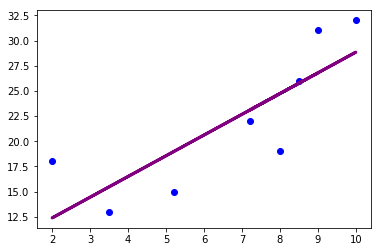

In [22]:
# 使用散点图绘制数据(蓝色)，以及训练获取得到的模型(紫色)
plt.scatter(__________)
plt.plot(___________)
plt.show()

# 练习2 (波士顿房价)
波士顿房价的数据在sklearn中提供，使用线性回归构建模型，具体步骤/要求参见下面的代码块。

说明：模型为$Y=\sum_{i=1}^{13}\omega_i x_i + b$，其中$x_i$为数据中的一个特征(总共有13个)。这是一个多变量的线性回归，在使用sklearn的方法上与单变量一致。

In [32]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# 加载数据
boston = load_boston()

**要求**：请通过`print`方法探索`boston`对象中的数据:
```
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
print(boston.data)
```

In [1]:
# 使用上述print语句探索数据

**要求**：请使用pandas库，
1. 为数据`boston.data`创建一个`pandas.DataFrame`对象，变量名称为`df`；
2. 为DataFrame对象赋于列名(boston.feature_names);
3. 增加一列数据，列名为`PRICE`,数据存储在`boston.target`中；


In [33]:
import pandas as pd

# 创建DataFrame对象
df = __________

# 为df赋值列名 (具体效果见讲义截图)
_______

# 为df增加'PRICE'列 (具体效果见讲义截图)


NameError: name '__________' is not defined

**要求**: 使用`sklearn`中的`linear_model.LinearRegression`对数据进行线性回归，请补充以下代码块中缺失的代码(标记为_____)：

In [52]:
from sklearn import linear_model

model = ______

# 构建样本数据(X, Y)
X = df.drop('PRICE', axis=1)
Y = ______

# 使用样本数据(X, Y)训练模型
____

# 使用数据X获取预测数据Y_prime
Y_prime = _____


# 计算均方差 (正确值为21.89777)
mse = _______
print(mse)

NameError: name '______' is not defined

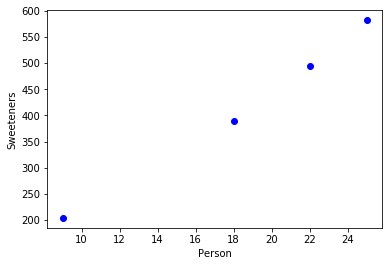

In [41]:
swimming_pool = [
    [22, 494],
    [25, 582],
    [18, 389],
    [9, 204],
]

# X和Y均是二维数组 (n_samples, n_features), n_samples是样本数量
# n_features是特征数量，在本例子中特征数量为1，也即阅读速度
X = np.array([[example[0]] for example in swimming_pool])
Y = np.array([[example[1]] for example in swimming_pool])

# 使用蓝色绘制X,Y的散点图
plt.scatter(X, Y, color='blue')
plt.xlabel('Person')
plt.ylabel('Sweeteners')
plt.show()

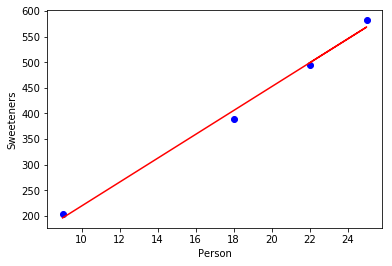

In [46]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, Y)
Y_prime = model.predict(X)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_prime, color='red')
plt.xlabel('Person')
plt.ylabel('Sweeteners')
plt.show()


In [49]:
# 计算y_prime与y_train之间的误差
Y_prime = model.predict(X)
mse = np.mean((Y_prime-Y)**2)
print(mse)

print("线性方程: {}*x + {}".format(model.coef_[0][0], \
                               model.intercept_[0]))

135.27327586206937
线性方程: 23.306896551724137*x + -13.927586206896535


# 参考
[1] scikit-learn linear regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[2] how to run linear regression: http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/